#AI Enhanced Multi Hazard Early Warning System


##Install the libraries

In [ ]:
!pip install requests pandas numpy plotly folium scikit-learn matplotlib seaborn streamlit

##Dataset (Data Collection and Loading)

In [ ]:
import requests
import pandas as pd
import numpy as np
import plotly.express as px
import folium
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from folium import plugins
import joblib

# Major Indian Cities
cities_india = {
    "Delhi": (28.6139, 77.2090),
    "Lucknow": (26.8467, 80.9462),
    "Chandigarh": (30.7333, 76.7794),
    "Shimla": (31.1048, 77.1734),
    "Srinagar": (34.0837, 74.7973),
    "Leh": (34.1526, 77.5771),
    "Jaipur": (26.9124, 75.7873),
    "Dehradun": (30.3165, 78.0322),
    "Mumbai": (19.0760, 72.8777),
    "Pune": (18.5204, 73.8567),
    "Gandhinagar": (23.2156, 72.6369),
    "Panaji": (15.4909, 73.8278),
    "Chennai": (13.0827, 80.2707),
    "Bengaluru": (12.9716, 77.5946),
    "Hyderabad": (17.3850, 78.4867),
    "Thiruvananthapuram": (8.5241, 76.9366),
    "Kolkata": (22.5726, 88.3639),
    "Patna": (25.5941, 85.1376),
    "Ranchi": (23.3441, 85.3096),
    "Bhubaneswar": (20.2961, 85.8245),
    "Guwahati": (26.1445, 91.7362),
    "Imphal": (24.8170, 93.9368),
    "Shillong": (25.5788, 91.8933),
    "Aizawl": (23.7271, 92.7176),
    "Kohima": (25.6751, 94.1086),
    "Agartala": (23.8315, 91.2868),
    "Itanagar": (27.0844, 93.6053),
    "Gangtok": (27.3389, 88.6065),
    "Bhopal": (23.2599, 77.4126),
    "Raipur": (21.2514, 81.6296),
}

# Fetch Weather Data
data_list = []
for city, (lat, lon) in cities_india.items():
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m,precipitation,wind_speed_10m"
    response = requests.get(url).json()
    try:
        temp = np.mean(response['hourly']['temperature_2m'])
        rain = np.mean(response['hourly']['precipitation'])
        wind = np.mean(response['hourly']['wind_speed_10m'])
    except:
        temp, rain, wind = None, None, None
    data_list.append({
        "city": city,
        "latitude": lat,
        "longitude": lon,
        "temperature": temp,
        "rainfall": rain,
        "wind_speed": wind
    })

df = pd.DataFrame(data_list)

# Save and Reload Dataset
path = "disaster_dataset.csv"
df.to_csv(path, index=False)
print(f"Dataset saved at {path}")

data = pd.read_csv(path)
print("\nDataset Info:")
print(data.info())
print("\nNumber of Unique Values per Column:")
print(data.nunique())
print("\nDataset Description:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())
print(data.shape)
display(data.head())

Dataset saved at disaster_dataset.csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         30 non-null     object 
 1   latitude     30 non-null     float64
 2   longitude    30 non-null     float64
 3   temperature  30 non-null     float64
 4   rainfall     30 non-null     float64
 5   wind_speed   30 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.5+ KB
None

Number of Unique Values per Column:
city           30
latitude       30
longitude      30
temperature    30
rainfall       30
wind_speed     30
dtype: int64

Dataset Description:
        latitude  longitude  temperature   rainfall  wind_speed
count  30.000000  30.000000    30.000000  30.000000   30.000000
mean   23.718190  82.211950    24.560536   0.434881    5.872222
std     6.118056   7.243863     4.200429   0.407599    2.900868
min     8.524100

,city,latitude,longitude,temperature,rainfall,wind_speed
0,Delhi,28.6139,77.2090,28.225000,0.166071,6.353571
1,Lucknow,26.8467,80.9462,27.025595,1.189286,7.329762
2,Chandigarh,30.7333,76.7794,28.167857,0.101786,6.071429
3,Shimla,31.1048,77.1734,18.186905,0.115476,4.938690
4,Srinagar,34.0837,74.7973,19.969048,0.004167,5.106548


##Explore and Understand the Data (Variate Analysis)

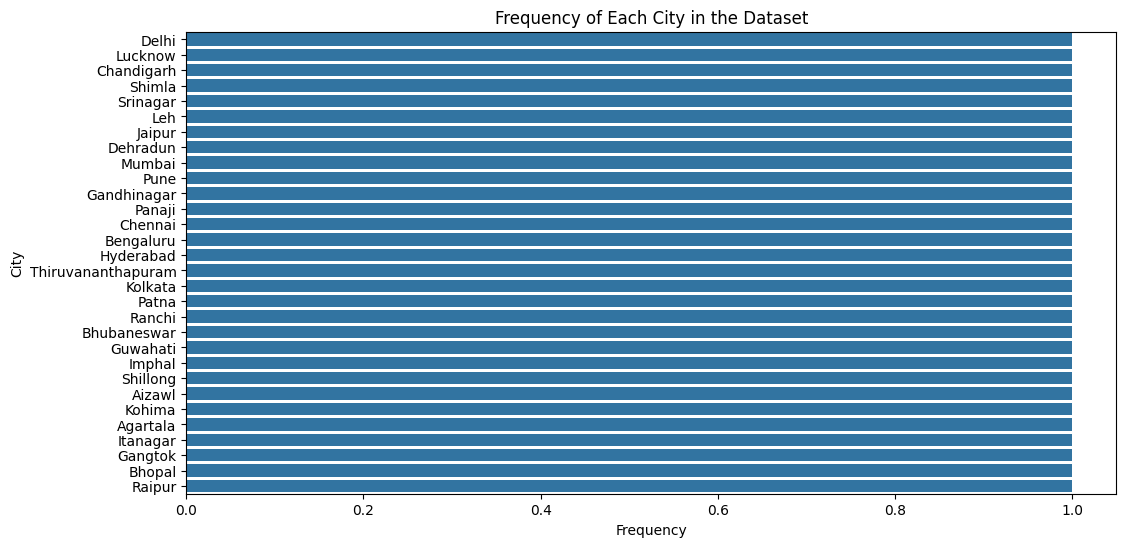

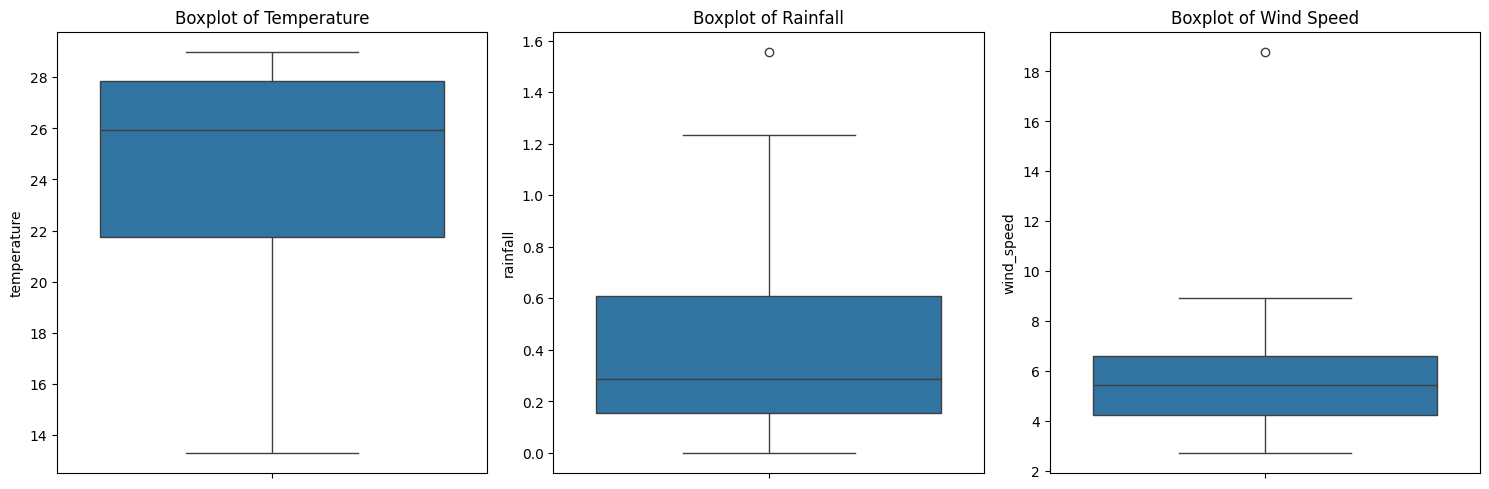

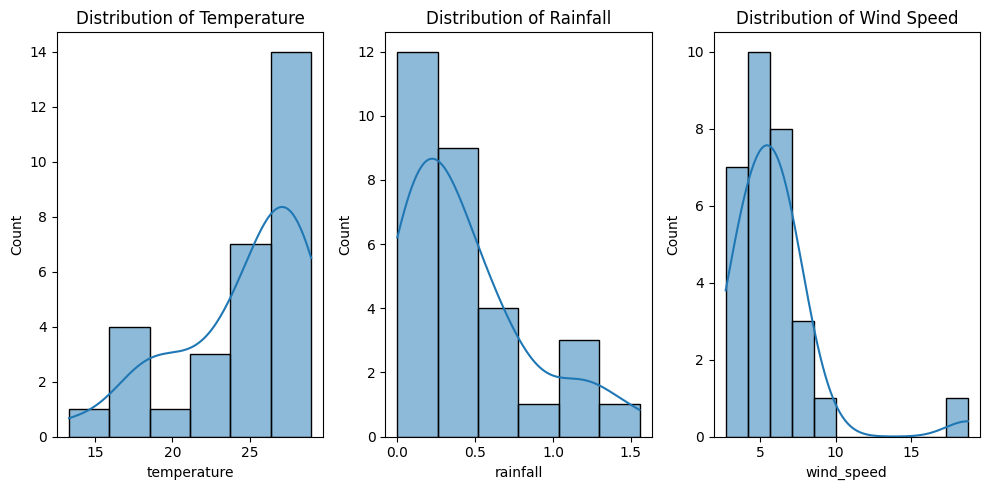

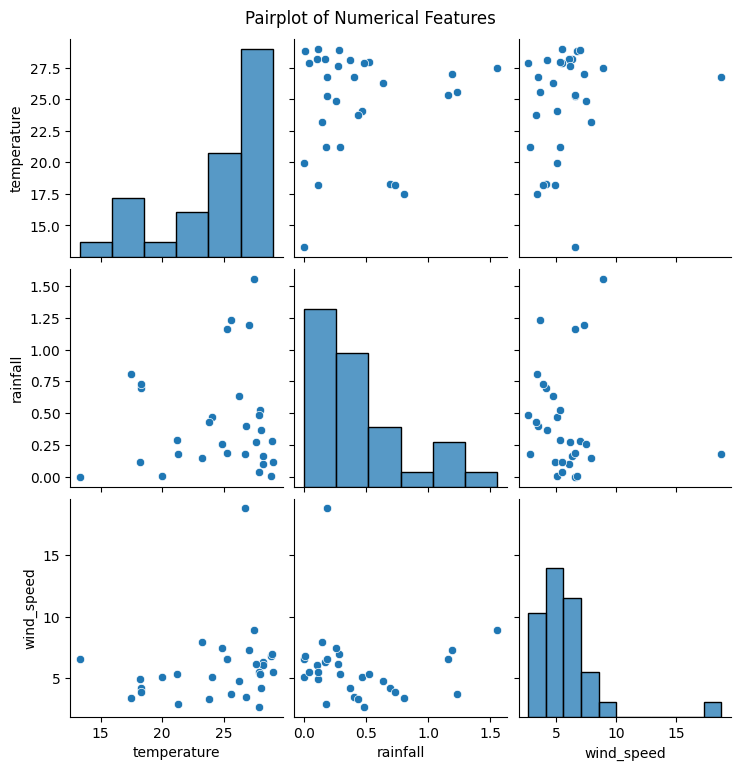

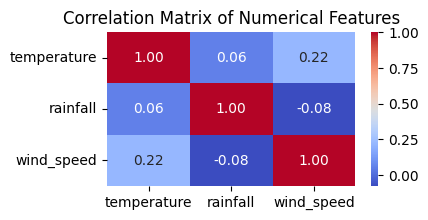

In [ ]:
# Univariate: Countplot for cities, Histplots/Boxplots for numerical
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='city', order=data['city'].value_counts().index)
plt.title('Frequency of Each City in the Dataset')
plt.xlabel('Frequency')
plt.ylabel('City')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=data, y='temperature')
plt.title('Boxplot of Temperature')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, y='rainfall')
plt.title('Boxplot of Rainfall')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, y='wind_speed')
plt.title('Boxplot of Wind Speed')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='temperature', kde=True)
plt.title('Distribution of Temperature')

plt.subplot(1, 3, 2)
sns.histplot(data=data, x='rainfall', kde=True)
plt.title('Distribution of Rainfall')

plt.subplot(1, 3, 3)
sns.histplot(data=data, x='wind_speed', kde=True)
plt.title('Distribution of Wind Speed')
plt.tight_layout()
plt.show()

# Bivariate: Boxplot (already above for individual, can pair with hazards after labels), Countplot (for hazards after labels)
# Note: Bivariate with hazards added after labels in preparation

# Multivariate: Pairplot and Heatmap
sns.pairplot(data[['temperature', 'rainfall', 'wind_speed']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

numerical_data = data[['temperature', 'rainfall', 'wind_speed']]
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##Data Preparation

,temperature,rainfall,wind_speed,city_Agartala,city_Aizawl,city_Bengaluru,city_Bhopal,city_Bhubaneswar,city_Chandigarh,city_Chennai,...,city_Mumbai,city_Panaji,city_Patna,city_Pune,city_Raipur,city_Ranchi,city_Shillong,city_Shimla,city_Srinagar,city_Thiruvananthapuram
0,28.225000,0.166071,6.353571,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,27.025595,1.189286,7.329762,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,28.167857,0.101786,6.071429,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,18.186905,0.115476,4.938690,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,19.969048,0.004167,5.106548,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


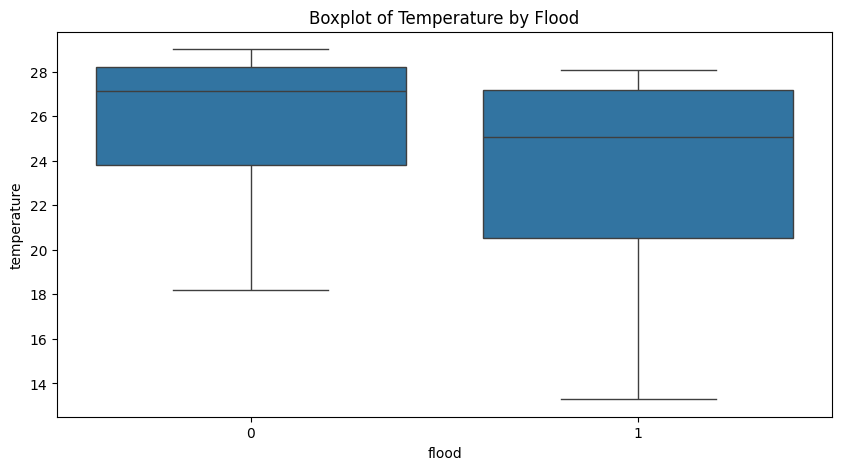

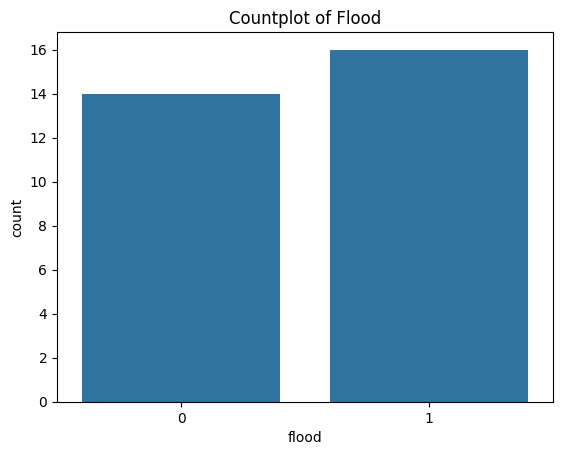

In [ ]:
# Fill missing values
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Synthetic Hazard Labels
np.random.seed(42)
data["flood"] = np.random.randint(0, 2, size=len(data))
data["drought"] = np.random.randint(0, 2, size=len(data))
data["cyclone"] = np.random.randint(0, 2, size=len(data))

# One-hot encode city
city_encoded = pd.get_dummies(data['city'], prefix='city')
X_transformed = pd.concat([data[['temperature', 'rainfall', 'wind_speed']], city_encoded], axis=1)
display(X_transformed.head())

# Now bivariate with hazards (e.g., boxplot temperature vs flood)
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='flood', y='temperature')
plt.title('Boxplot of Temperature by Flood')
plt.show()

sns.countplot(data=data, x='flood')
plt.title('Countplot of Flood')
plt.show()
# Repeat for other hazards if needed

##Model Selection, Training

In [ ]:
# Train/Test Split
X = data[["temperature", "rainfall", "wind_speed"]]
y = data[["flood", "drought", "cyclone"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

# Model Selection: Ensemble with RF and GB
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
ensemble = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')
multi_target_model = MultiOutputClassifier(ensemble)
multi_target_model.fit(X_train, y_train)
print("Model training complete.")

Training features shape: (24, 3)
Testing features shape: (6, 3)
Training labels shape: (24, 3)
Testing labels shape: (6, 3)
Model training complete.


##Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = multi_target_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Flood", "Drought", "Cyclone"]))

# Algorithm Name: MultiOutputClassifier with VotingClassifier (RF + GB)
print("Algorithm Used: MultiOutputClassifier(VotingClassifier(RandomForestClassifier, GradientBoostingClassifier))")

# Accuracy per label
for i, hazard in enumerate(["Flood", "Drought", "Cyclone"]):
    acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{hazard} Accuracy: {acc:.2f}")

# Confusion Matrix per label
for i, hazard in enumerate(["Flood", "Drought", "Cyclone"]):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    print(f"{hazard} Confusion Matrix:\n{cm}")

# Probabilities
probs = []
for _, row in data.iterrows():
    x = row[['temperature', 'rainfall', 'wind_speed']].values.reshape(1,-1)
    prob = multi_target_model.predict_proba(x)
    prob = [p[0][1] for p in prob]
    probs.append(prob)
data['Flood_prob'], data['Drought_prob'], data['Cyclone_prob'] = np.array(probs).T
city_probs = data.groupby('city')[['latitude', 'longitude', 'Flood_prob','Drought_prob','Cyclone_prob']].mean().reset_index()
print("\nAverage Hazard Probabilities by City:")
display(city_probs)


Classification Report:
              precision    recall  f1-score   support

       Flood       0.67      0.50      0.57         4
     Drought       1.00      0.50      0.67         2
     Cyclone       1.00      0.60      0.75         5

   micro avg       0.86      0.55      0.67        11
   macro avg       0.89      0.53      0.66        11
weighted avg       0.88      0.55      0.67        11
 samples avg       0.75      0.53      0.61        11

Algorithm Used: MultiOutputClassifier(VotingClassifier(RandomForestClassifier, GradientBoostingClassifier))
Flood Accuracy: 0.50
Drought Accuracy: 0.83
Cyclone Accuracy: 0.67
Flood Confusion Matrix:
[[1 1]
 [2 2]]
Drought Confusion Matrix:
[[4 0]
 [1 1]]
Cyclone Confusion Matrix:
[[1 0]
 [2 3]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib


Average Hazard Probabilities by City:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739:

,city,latitude,longitude,Flood_prob,Drought_prob,Cyclone_prob
0,Agartala,23.8315,91.2868,0.959388,0.954978,0.131603
1,Aizawl,23.7271,92.7176,0.759725,0.954978,0.473870
2,Bengaluru,12.9716,77.5946,0.091366,0.974968,0.874310
3,Bhopal,23.2599,77.4126,0.939053,0.030039,0.827970
4,Bhubaneswar,20.2961,85.8245,0.005238,0.979967,0.874139
5,Chandigarh,30.7333,76.7794,0.040238,0.849967,0.154606
6,Chennai,13.0827,80.2707,0.106007,0.879947,0.118252
7,Dehradun,30.3165,78.0322,0.146397,0.025012,0.067767
8,Delhi,28.6139,77.2090,0.070357,0.125091,0.109067
9,Gandhinagar,23.2156,72.6369,0.050357,0.140059,0.856579


##Model Tuning and Optimization

In [ ]:
# Placeholder for tuning (not in original, added as per instructions): Grid Search example
from sklearn.model_selection import GridSearchCV

param_grid = {'estimator__rf__n_estimators': [50, 100], 'estimator__gb__n_estimators': [50, 100]}
grid = GridSearchCV(multi_target_model, param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
multi_target_model = grid.best_estimator_  # Update model

# Re-compute confusion matrix (as per instructions, though for predictions not numerical features)
y_pred = multi_target_model.predict(X_test)
for i, hazard in enumerate(["Flood", "Drought", "Cyclone"]):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    print(f"Optimized {hazard} Confusion Matrix:\n{cm}")

Best Params: {'estimator__gb__n_estimators': 50, 'estimator__rf__n_estimators': 50}
Optimized Flood Confusion Matrix:
[[1 1]
 [2 2]]
Optimized Drought Confusion Matrix:
[[4 0]
 [0 2]]
Optimized Cyclone Confusion Matrix:
[[1 0]
 [2 3]]


##Final Model Testing and Saving

In [ ]:
# Final Testing
print("\nFinal Classification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=["Flood", "Drought", "Cyclone"]))

# Save Model
model_filename = "multi_target_model.joblib"
joblib.dump(multi_target_model, model_filename)
print(f"\nTrained model saved to {model_filename}")


Final Classification Report on Test Set:
              precision    recall  f1-score   support

       Flood       0.67      0.50      0.57         4
     Drought       1.00      1.00      1.00         2
     Cyclone       1.00      0.60      0.75         5

   micro avg       0.88      0.64      0.74        11
   macro avg       0.89      0.70      0.77        11
weighted avg       0.88      0.64      0.73        11
 samples avg       0.75      0.58      0.64        11


Trained model saved to multi_target_model.joblib


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



## Interactive Plotly Dashboard

In [ ]:
# Interactive Plotly Dashboard
fig = px.bar(
    city_probs.melt(id_vars='city', value_vars=['Flood_prob', 'Drought_prob', 'Cyclone_prob'], var_name='Hazard', value_name='Probability'),
    x='city', y='Probability', color='Hazard', barmode='group',
    title="Interactive Hazard Probabilities Across India"
)
fig.show()

## Folium map with colored markers, heatmap, layers, legend (interactive; red for high risk).

In [ ]:
# Folium Map
india_map = folium.Map(location=[22.9734, 78.6569], zoom_start=5)
disaster_layers = {
    "Flood": folium.FeatureGroup(name="Flood Risk"),
    "Drought": folium.FeatureGroup(name="Drought Risk"),
    "Cyclone": folium.FeatureGroup(name="Cyclone Risk"),
    "All": folium.FeatureGroup(name="All Risks")
}
for _, row in city_probs.iterrows():
    risks = {"Flood": row["Flood_prob"], "Drought": row["Drought_prob"], "Cyclone": row["Cyclone_prob"]}
    for disaster, risk_value in risks.items():
        color = "green" if risk_value <= 0.3 else "orange" if risk_value <= 0.6 else "red"
        folium.CircleMarker(location=[row["latitude"], row["longitude"]], radius=8, popup=f"{row['city']} - {disaster} Risk: {risk_value:.2f}", color=color, fill=True, fill_color=color, fill_opacity=0.7).add_to(disaster_layers[disaster])
    total_risk = sum(risks.values()) / 3
    all_color = "green" if total_risk <= 0.3 else "orange" if total_risk <= 0.6 else "red"
    folium.CircleMarker(location=[row["latitude"], row["longitude"]], radius=10, popup=f"{row['city']} - Total Risk: {total_risk:.2f}", color=all_color, fill=True, fill_color=all_color, fill_opacity=0.7).add_to(disaster_layers["All"])
    if total_risk > 0.8:
        folium.Marker(location=[row["latitude"], row["longitude"]], icon=folium.DivIcon(html=f"""<div style="color:red; font-weight:bold; animation: blinker 1s linear infinite;">⚠️ {row['city']} Extreme Risk ({total_risk:.2f})</div>""")).add_to(india_map)
for layer in disaster_layers.values():
    layer.add_to(india_map)
heat_data = [[row["latitude"], row["longitude"], (row["Flood_prob"] + row["Drought_prob"] + row["Cyclone_prob"])/3] for _, row in city_probs.iterrows()]
plugins.HeatMap(heat_data, radius=25, blur=15, max_zoom=10).add_to(india_map)
folium.LayerControl(collapsed=False).add_to(india_map)
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 160px;
            border:2px solid grey; z-index:9999; font-size:14px; background-color:white; padding: 10px;">
<b> Risk Level </b><br>
<i style="background:green; width:15px; height:15px; float:left; margin-right:8px;"></i> Low (≤ 0.3)<br>
<i style="background:orange; width:15px; height:15px; float:left; margin-right:8px;"></i> Medium (0.3–0.6)<br>
<i style="background:red; width:15px; height:15px; float:left; margin-right:8px;"></i> High (> 0.6)<br>
</div>
<style>
@keyframes blinker { 50% { opacity: 0; } }
</style>
'''
india_map.get_root().html.add_child(folium.Element(legend_html))
india_map

##Deployment (Streamlit App)

In [ ]:
!pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=299ab6907731d5696f1a4eb81183af4733831074c047473f74f75cf8c32c5d9c
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import feedparser
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import time

# Load the trained model
try:
    multi_target_model = joblib.load('multi_target_model.joblib')
except FileNotFoundError:
    st.error("Error: Model file 'multi_target_model.joblib' not found. Please make sure it is in the correct directory.")
    st.stop()

# Function to convert speed label to marquee scroll speed
def get_scroll_amount(speed_label):
    return {'slow': '2', 'normal': '5', 'fast': '10'}.get(speed_label.lower(), '5')

# Function to fetch alert-related news for India using Google News RSS
def fetch_india_disaster_news():
    query = f"\"weather updates\" OR forecasting OR \"disaster alerts\" OR \"hazard alerts\" OR earthquake OR cyclone OR tsunami OR \"forest fire\" India Recent updates"
    query = query.replace(' ', '+')
    rss_url = f"https://news.google.com/rss/search?q={query}&hl=en&gl=US&ceid=US:en"

    feed = feedparser.parse(rss_url)
    news_alerts = []

    # Fetch only the latest entries (e.g., the first 15)
    for entry in feed.entries[:15]:
        news_alerts.append({
            'title': entry.get('title', 'N/A'),
            'summary': entry.get('summary', 'N/A'),
            'link': entry.get('link', ''),
            'published': entry.get('published', 'N/A')
        })

    return news_alerts


# Set page configuration
st.set_page_config(page_title="Multi-Hazard Early Warning System", layout="wide")

st.title("AI-Enhanced Early Warning System for Multi-Hazard Scenarios")

st.write("Enter the weather data to get hazard predictions.")

# Create input fields
st.sidebar.header("Weather Data Input")

temperature = st.sidebar.number_input("Temperature (°C)", min_value=-50.0, max_value=50.0, value=25.0)
rainfall = st.sidebar.number_input("Rainfall (mm)", min_value=0.0, max_value=1000.0, value=10.0)
wind_speed = st.sidebar.number_input("Wind Speed (km/h)", min_value=0.0, max_value=200.0, value=15.0)

# Make predictions
if st.sidebar.button("Predict Hazards"):
    input_data = np.array([[temperature, rainfall, wind_speed]])
    probs = multi_target_model.predict_proba(input_data)
    flood_prob = probs[0][0][1] if len(probs[0][0]) > 1 else 0
    drought_prob = probs[1][0][1] if len(probs[1][0]) > 1 else 0
    cyclone_prob = probs[2][0][1] if len(probs[2][0]) > 1 else 0

    st.subheader("Hazard Prediction Probabilities:")
    st.write(f"Flood Probability: {flood_prob:.2f}")
    st.progress(flood_prob)
    st.write(f"Drought Probability: {drought_prob:.2f}")
    st.progress(drought_prob)
    st.write(f"Cyclone Probability: {cyclone_prob:.2f}")
    st.progress(cyclone_prob)

# Display news alerts in a marquee
st.subheader("Latest Disaster Alerts (India):")
news_alerts = fetch_india_disaster_news()

if news_alerts:
    marquee_content = ""
    for alert in news_alerts:
        marquee_content += f"<b>{alert['title']}</b> - {alert['summary']} | "

    st.markdown(
        f"""
        <marquee behavior="scroll" direction="left" scrollamount="{get_scroll_amount('normal')}">
            {marquee_content}
        </marquee>
        """,
        unsafe_allow_html=True
    )
else:
    st.write("No recent disaster alerts found for India.")

Overwriting app.py


## Executing your Streamlit App

In [ ]:
# install local tunnel in our streamlit app
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏
up to date, audited 23 packages in 2s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠏

In [ ]:
import subprocess

# Execute the shell command and capture the output
# Use subprocess.run to run the command and capture stdout
result = subprocess.run(['curl', 'ifconfig.me'], capture_output=True, text=True)

# Get the output from stdout and strip whitespace
tunnel_password = result.stdout.strip()

print("Your Tunnel Password:", tunnel_password)

Your Tunnel Password: 34.91.170.224


In [ ]:
print("Click on the localtunnel URL of 'your url is:'(for example: your url is: https://breezy-corners-doubt.loca.lt), then enter your Tunnel password to view your Streamlit app in your browser")
!streamlit run app.py & npx localtunnel --port 8501

Click on the localtunnel URL of 'your url is:'(for example: your url is: https://breezy-corners-doubt.loca.lt), then enter your Tunnel password to view your Streamlit app in your browser


⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.170.224:8501

your url is: https://empty-hounds-allow.loca.lt
